In [162]:
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig

# biological networks
The term "biological networks" describes the interdependent systems found in living things; these systems are sometimes shown as intricate webs made up of molecules, genes, proteins, or other biological components. comprehension of diverse biological processes, such as cellular activities, signaling routes, and connections between multiple parts inside an organism, requires a comprehension of these networks.

There are several types of biological networks:
* Gene Regulatory Networks
* Protein-Protein Interaction Networks
* Metabolic Networks
* Signaling Networks
* Neural Networks
* Phylogenetic networks

In [5]:
def network_to_dict(file):
    network = {}
    with open(file, 'r') as fi: 
        for line in fi: 
            a, b = line.strip().split(',') 
            network.setdefault(a, set()).add(b) 
            network.setdefault(b, set()).add(a) 
 
    int_keys, sorted_int_keys = [], []
    str_keys, sorted_str_keys = [], []

    # Separate keys by type: integers and strings
    for key in network.keys():
        if key.isnumeric(): 
            int_keys.append(key)

        else: 
            str_keys.append(key)
    
    sorted_int_keys = sorted(int_keys, key=int)
    sorted_str_keys = sorted(str_keys)

    # Create a new dictionary with sorted keys
    sorted_dict = {key: network[key] for key in sorted_int_keys + sorted_str_keys}

    return sorted_dict

In [6]:
network_1 = network_to_dict('reseau1.txt')
network_2 = network_to_dict('reseau2.txt')
network_3 = network_to_dict('reseau3.txt')

## Degree distribution

In [7]:
# network_distribution function 
# input: network dictionary
# output: nodes list and degree lis
def network_distribution(network_dict):
    degree = []
    for key in network_dict:
        degree.append(len(network_dict[key]))
    return list(network_dict.keys()), degree

In [8]:
node_n1, degree_n1 = network_distribution(network_1)
node_n2, degree_n2 = network_distribution(network_2)
node_n3, degree_n3 = network_distribution(network_3)

In [49]:
def plot_network_distribution(network, networks_name, every_nth = None):
    
    node_list, degree_list = network_distribution(network)
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))  # Adjust figsize as needed
    fig.suptitle('Degree Distribution of '+networks_name) 

    axs[0].scatter(node_list, degree_list, s=50)  # Scatter plot on the first subplot
    axs[0].set_title('Scatter Plot')  # Set title for the first subplot

    axs[1].bar(node_list, degree_list)  # Bar plot on the second subplot
    axs[1].set_title('Bar Plot')  # Set title for the second subplot
    

    if every_nth != None:
        axs[0].set_xticks()
        axs[0].set_xticklabels(node_list[::every_nth], rotation=45) 
        axs[1].set_xticks(node_list[::every_nth])
        axs[1].set_xticklabels(node_list[::every_nth], rotation=45)
    else: 
        axs[0].set_xticklabels(node_list, rotation=60) 
        axs[1].set_xticklabels(node_list, rotation=60) 

    plt.tight_layout()  # Adjust subplot parameters to give specified padding
    plt.show()

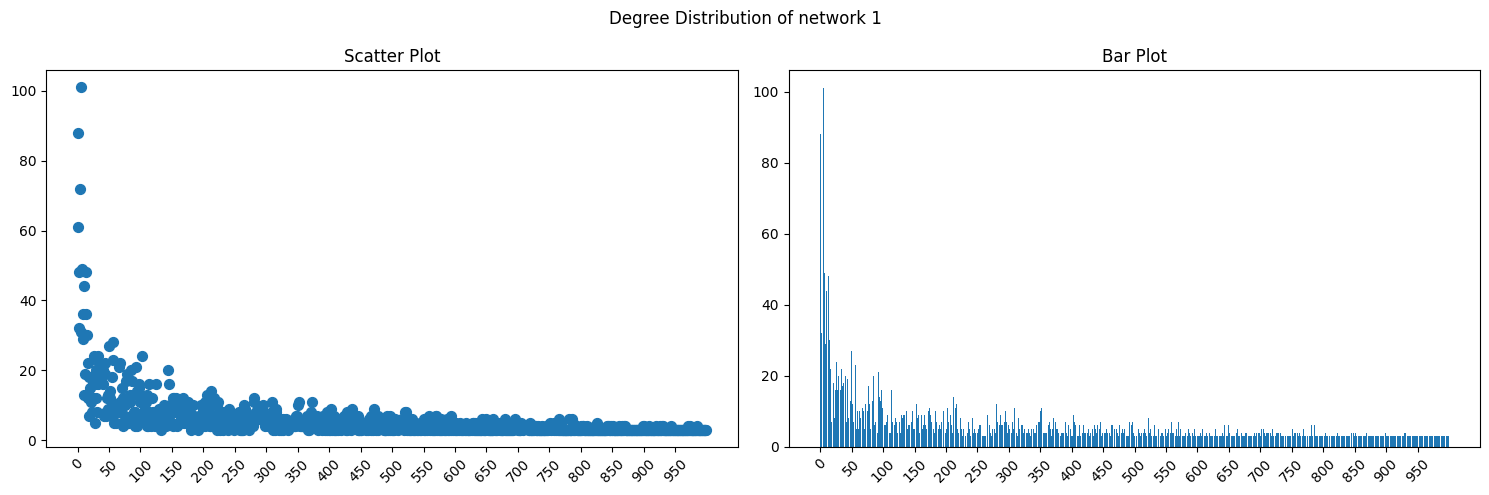

In [50]:
plot_network_distribution(network_1, networks_name = 'network 1', every_nth = 50)

* We observe that the first network can be scale-free because it follows Poisson distribution. We can see the initial nodes with a very high degree of distribution, while the subsequent ones have much less. 

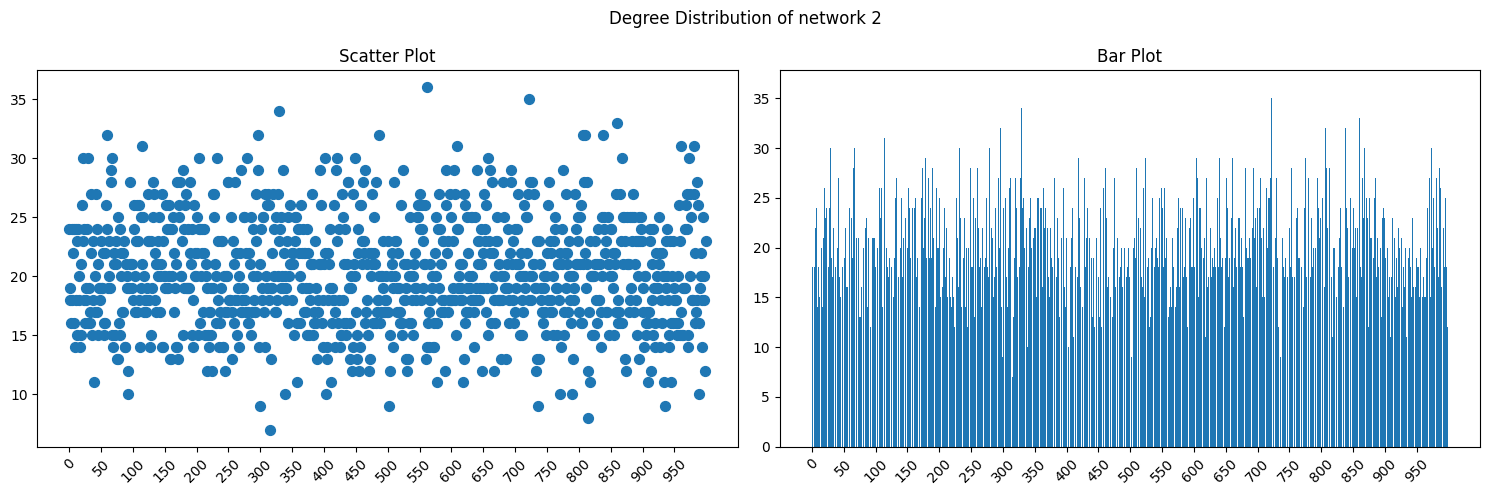

In [51]:
plot_network_distribution(network_2, networks_name = 'network 2', every_nth = 50)

* For the second network, it is a random graph, the nodes degree of distribution is generally around 18 connections.

C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\2378766943.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(node_list, rotation=60)
C:\Users\DELL\AppData\Local\Temp\ipykernel_18124\2378766943.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(node_list, rotation=60)


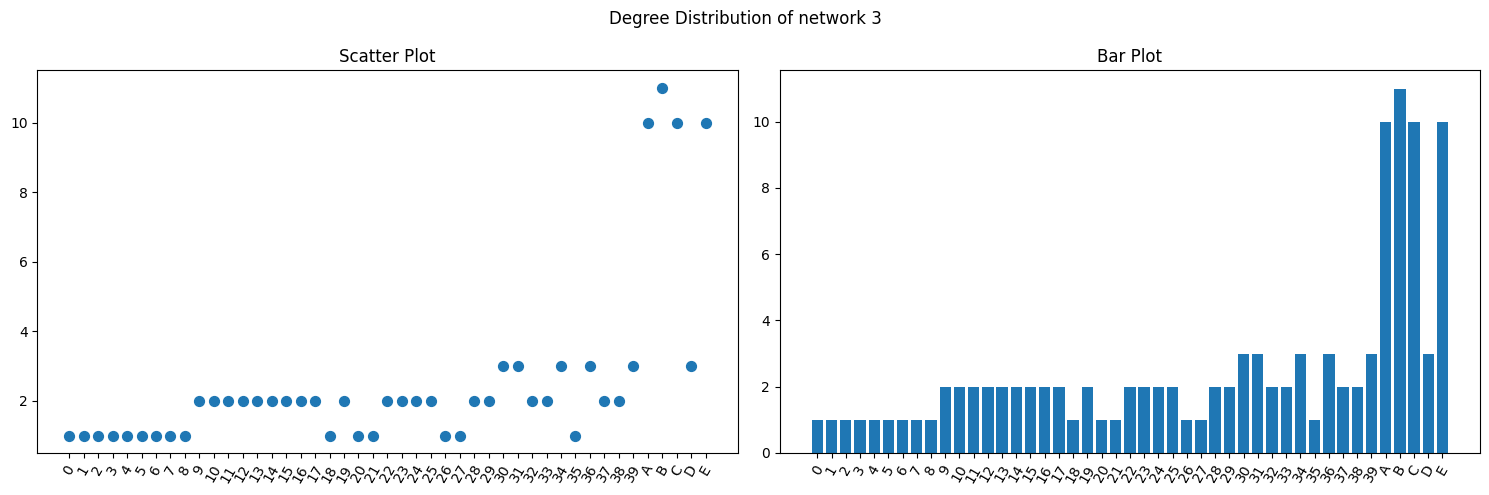

In [52]:
plot_network_distribution(network_3, networks_name = 'network 3')

* For the third network, it is a Scale Free model. We observe that distribution the follows a power law .

## Clustering coefficient
The clustering coefficient C is defined as the average probability that two neighbors of a node are connected to each other. It is calculated as follows:
$$C_{v} = \frac{2E_{v}}{d_{v}(d_{v}-1)}$$
where: 
* $v$ is a node in the network.
* $E_{v}$ is the number of edges between neighbors of $v$. 
* $d_{v}$ is the number of neighbors of node $v$.

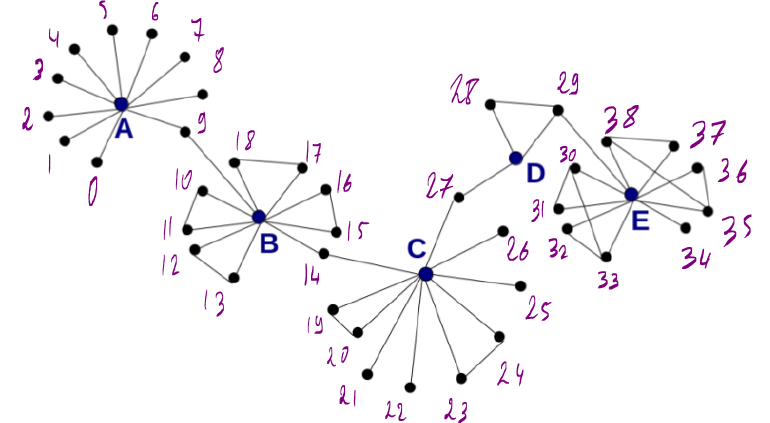
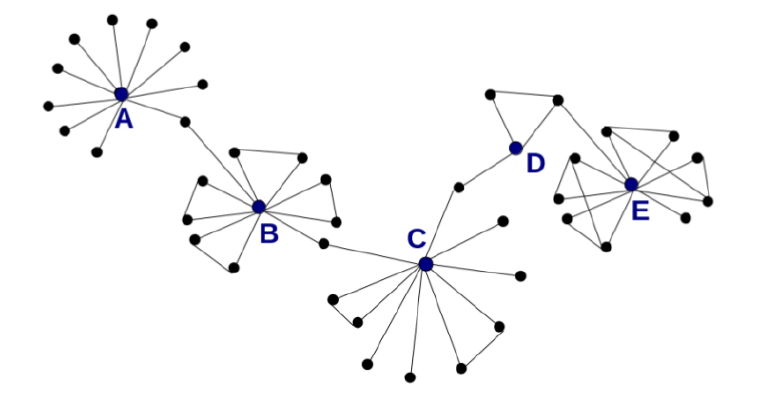

$C_{A} = \frac{2 \times E_{A}}{d_{A}(d_{A}-1)} = \frac{2 \times 0}{10\times(10-1)} = 0$ \
$C_{B} = \frac{2 \times E_{B}}{d_{B}(d_{B}-1)} = \frac{2 \times 4}{10\times(10-1)} = \frac{4}{45} \sim 0.0888$ \
$C_{C} = \frac{2 \times E_{C}}{d_{C}(d_{C}-1)} = \frac{2 \times 2}{10\times(10-1)} = \frac{2}{45} \sim 0.0444$ \
$C_{D} = \frac{2 \times E_{D}}{d_{D}(d_{D}-1)} = \frac{2 \times 1}{3\times(3-1)} = \frac{1}{3} \sim 0.333$ \
$C_{E} = \frac{2 \times E_{E}}{d_{E}(d_{E}-1)} = \frac{2 \times 6}{10\times(10-1)} = \frac{2}{15} \sim 0.133$  


In [96]:
def nbr_edges_between_v_neighboors(network,v):
    e = 0
    # get v nodes neighboors 
    v_neighboors = network[v].copy()
    while len(v_neighboors) != 0:
        # u is a v neighboors node
        u = next(iter(v_neighboors))
        # get u nodes neighboors
        u_neighboors = network[u]
        # number of edges between n v nodes neighboors are the intersction between u_neighboors and v_neighboors
        e += len(u_neighboors.intersection(v_neighboors))        
        # remove u from the list (because an edge uv is the same as vu in undirected graph)
        v_neighboors.pop()
    return e



def clustering_coefficient(network):
    nodes, degree = network_distribution(network)
    clustering_coefficient_list = []
    # for each node 
    for i in range(len(nodes)):
        v = nodes[i]
        # d_v : degree of node v
        d_v = degree[i]
        if d_v == 1: 
            clustering_coefficient_v = 0
        else:
            # e_v : number of edges between node's neighboors
            e_v = nbr_edges_between_v_neighboors(network,v)
            # calculate the clustering coefficient of node v
            clustering_coefficient_v = (2*e_v)/(d_v*(d_v-1))

        # add clustering_coefficient to the list
        clustering_coefficient_list.append(clustering_coefficient_v) 
    return clustering_coefficient_list

* High clustering coefficient:
* Low clustering coefficient: 

In [156]:
# input: network: dictionary (key-> node, value-> neighbors)
#        threshold to define a node as a hub
# output: plot a graph using igraph
def plot_graph(network, threshold=5):

    # Get nodes and degrees of network
    nodes, degree = network_distribution(network)

    # Create an empty directed graph
    g = ig.Graph(directed=False)

    # Add vertices (nodes) to the graph
    g.add_vertices(nodes)

    added_edges = set()
    # Add edges based on the network dictionary
    for node, neighbors in network.items():
        for neighbor in neighbors:
            if (node, neighbor) not in added_edges and (neighbor, node) not in added_edges:
                g.add_edge(node, neighbor)
                added_edges.add((node, neighbor))

    # Define node colors based on their degrees
    node_colors = ['blue' if deg <= threshold else 'red' for deg in degree]

    # Plot the graph with node colors
    visual_style = {
        "vertex_color": node_colors,  # Color nodes based on their degree
        "vertex_label": nodes,
        "bbox": (600, 600),
        "margin": 20,
        "layout": g.layout("kk"),  # Kamada-Kawai layout
    }

    return ig.plot(g, **visual_style)

network 3


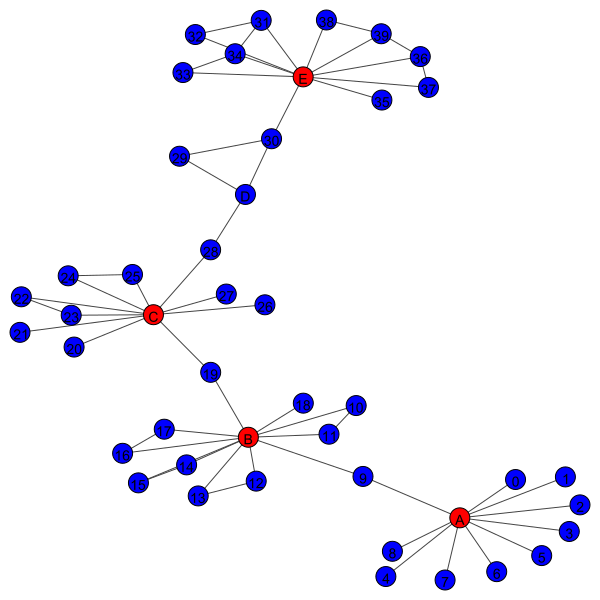

In [157]:
print("network 3")
plot_graph(network_3)

In [103]:
clustering_coefficient_list = clustering_coefficient(network_3)
print("clustering coefficient of node")
for i in range(len(clustering_coefficient_list)):
    print("C(",node_n3[i],") = ",clustering_coefficient_list[i])

clustering coefficient of node
C( 0 ) =  0
C( 1 ) =  0
C( 2 ) =  0
C( 3 ) =  0
C( 4 ) =  0
C( 5 ) =  0
C( 6 ) =  0
C( 7 ) =  0
C( 8 ) =  0
C( 9 ) =  0.0
C( 10 ) =  1.0
C( 11 ) =  1.0
C( 12 ) =  1.0
C( 13 ) =  1.0
C( 14 ) =  1.0
C( 15 ) =  1.0
C( 16 ) =  1.0
C( 17 ) =  1.0
C( 18 ) =  0
C( 19 ) =  0.0
C( 20 ) =  0
C( 21 ) =  0
C( 22 ) =  1.0
C( 23 ) =  1.0
C( 24 ) =  1.0
C( 25 ) =  1.0
C( 26 ) =  0
C( 27 ) =  0
C( 28 ) =  0.0
C( 29 ) =  1.0
C( 30 ) =  0.3333333333333333
C( 31 ) =  0.6666666666666666
C( 32 ) =  1.0
C( 33 ) =  1.0
C( 34 ) =  0.6666666666666666
C( 35 ) =  0
C( 36 ) =  0.6666666666666666
C( 37 ) =  1.0
C( 38 ) =  1.0
C( 39 ) =  0.6666666666666666
C( A ) =  0.0
C( B ) =  0.07272727272727272
C( C ) =  0.044444444444444446
C( D ) =  0.3333333333333333
C( E ) =  0.13333333333333333


In [160]:
def avrage_clustering_coefficient(network):
    clustering_coefficient_list = clustering_coefficient(network)
    return sum(clustering_coefficient_list)/len(clustering_coefficient_list)

In [161]:
networks = [network_1,network_2,network_3]
for i in range(len(networks)):
    print("avrage clustering coefficient of network",i+1,"is",avrage_clustering_coefficient(networks[i]))

avrage clustering coefficient of network 1 is 0.027004490481315802
avrage clustering coefficient of network 2 is 0.020351746799949482
avrage clustering coefficient of network 3 is 0.45741863075196415


* the average clustering coefficients between different networks can help identify distinct patterns or features.
    * A high average suggests that nodes in a graph tend to form dense and highly connected clusters.
    * A lower average indicates that the graph tends to be less dense, with looser connections between nodes.

## Betweenness centrality

In [ ]:
def betweenness_centrality(node):
    pass